# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 3: Statistical analysis - Part 1

### Goals 

- To transition from data analytics to basic statistical analysis.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.


### Instructions

- This assignment is structured as a single block, using the same dataset throughout.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 107 (plus up to 25 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

-------------------
## The Iris dataset

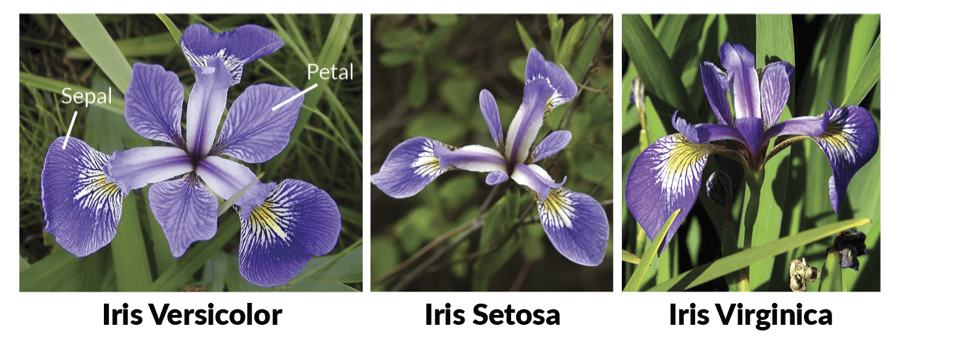

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

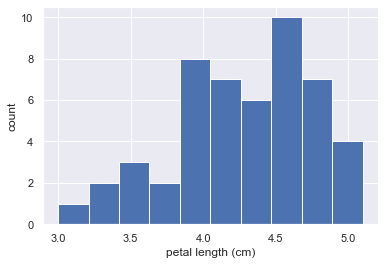

In [2]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


## Your turn! (12 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 

3. Compute summary statistics (2 pts each): mean and standard deviation 

## Solution

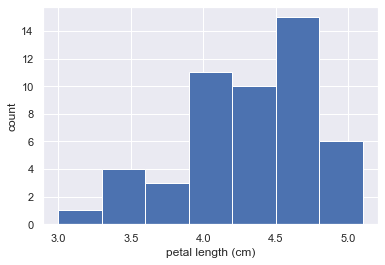

In [3]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
# Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)
plt.hist(versicolor_petal_length, bins=int(np.sqrt(len(versicolor_petal_length))))

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


[[3.   0.02]
 [3.3  0.04]
 [3.5  0.04]
 [3.6  0.02]
 [3.7  0.02]
 [3.8  0.02]
 [3.9  0.06]
 [4.   0.1 ]
 [4.1  0.06]
 [4.2  0.08]
 [4.3  0.04]
 [4.4  0.08]
 [4.5  0.14]
 [4.6  0.06]
 [4.7  0.1 ]
 [4.8  0.04]
 [4.9  0.04]
 [5.   0.02]
 [5.1  0.02]]


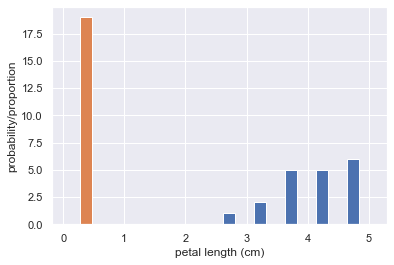

In [4]:
# 2.Modify the histogram above, such that the y axis shows 
# probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 
sns.set()
val, cnt = np.unique(versicolor_petal_length, return_counts=True)
pmf = cnt/len(versicolor_petal_length)
pmf_d = np.column_stack((val,pmf))
print(pmf_d)
plt.hist(pmf_d)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('probability/proportion')

# Show histogram
plt.show()

In [5]:
# 3. Compute summary statistics (2 pts each): mean and standard deviation
print("mean: ",versicolor_petal_length.mean(),"\nstandard deviation: ", versicolor_petal_length.std())

mean:  4.26 
standard deviation:  0.46991097723995806


## Your turn! (6 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

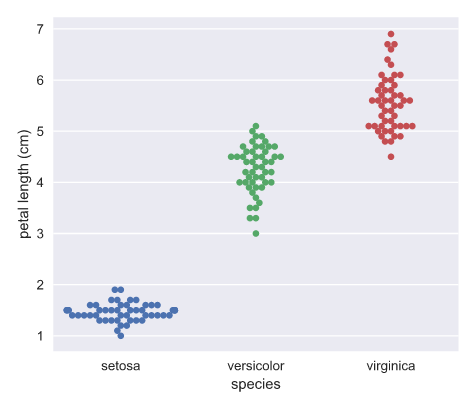

## Solution

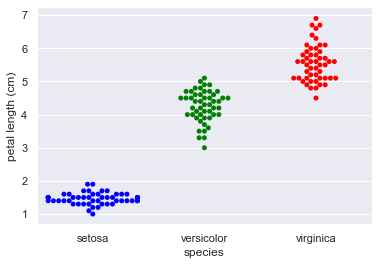

In [6]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
sns.swarmplot(x='species',y='petal_length',data=iris, palette=['blue','green','red'])
plt.xlabel('species')
plt.ylabel('petal length (cm)')

plt.show()

## Questions 1-2 (12 points, i.e. 6 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

## Solution

1.) The "binning bias" associested with histogram plots is the number of bins being reliant upon some set of paramenters that is modeled in the histogram. The analysis of a histogram can be highly dependent on the number of bins chosen. The results obtained from different choices of bins sets may differ more than the reported uncertainty in the fit. Thus the modeled distribution on the histogram may be biased based on the number of bins chosen.  Because the instances are grouped together based on bins, the exact values are not very well expressed and can be biased to look different based on the number of bins. Depending on tge dataset, the bias can be quite significant. 

2.) The bee swarm plot is a special scatter plot that can provide a visual overview of the data by organizing the orientation in a specific way. The orientation in a swarm plot can be inferred by the choice of columns where the y column spreads out the values vertically and horizontally groups the columnsby the x column. It shows the distribution of actual datapoints that preserves individual samples (individual spread) and not bins. Each point can be colored by the hue. It is good to use swarm plots where there a specific measurement (such as petal length) that can be divided into multiple categories (such as species) to view the distribution and variance of the measurements across categories. This should not be used to model variables that are not continuous or if there are not measured variables that correspond to multiple categories. In the bee swarm plot, each sample of the variable is displayed so distribution can be modeled. You can see where there is a larger concentration of points. The range of the variable is also viewable. It is not good to use it when there are many samples (sample size is too large, since like points to not overlap to see spread). 


## Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Your turn! (12 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

Your plot should look like this:

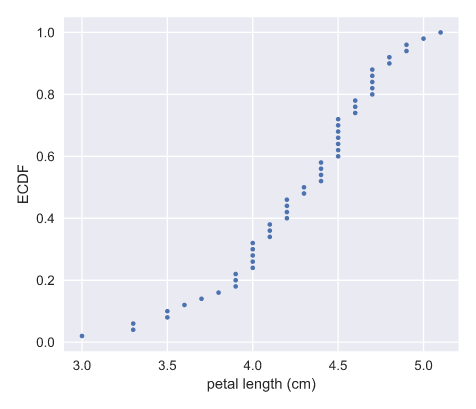

## Solution

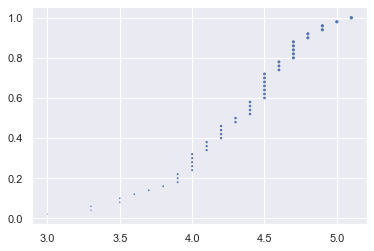

In [8]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
x,y = ecdf(versicolor_petal_length)
# print(x)
plt.scatter(x,y,s=x*y)

## Your turn! (8 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

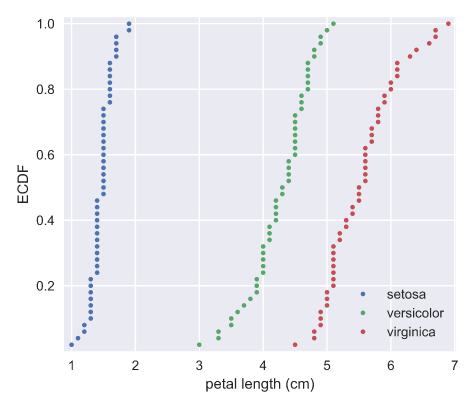

## Solution

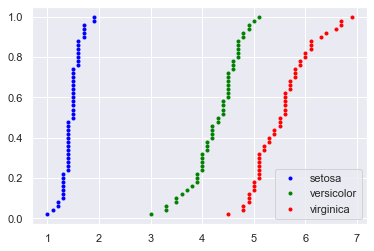

In [9]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
virginica_petal_length = iris[iris.species == 'virginica'].petal_length

a, b=ecdf(setosa_petal_length)
c, d=ecdf(virginica_petal_length)

# plt.scatter(a ,b,s=a*b, label='setosa',color='blue')
# plt.scatter(x, y, s=x*y,label='versicolor',color='green')
# plt.scatter(c, d, s=c*d, label='virginica',color='red')
plt.plot(a, b, '.', color='blue',label= 'setosa')
plt.plot(x, y, '.', color='green', label ='versicolor' )
plt.plot(c, d, '.', color='red', label='virginica')
plt.legend()
plt.show()            

## Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

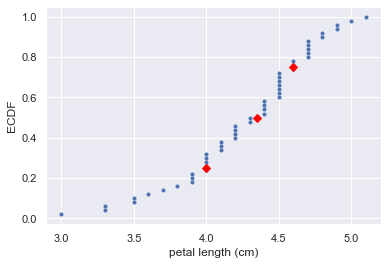

In [10]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Compute ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Your turn! (10 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.


## Solution

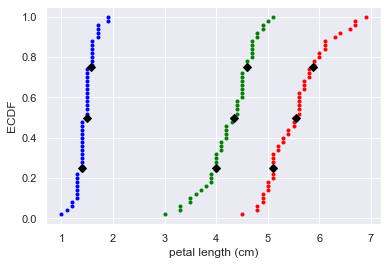

In [11]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_setosav = np.percentile(setosa_petal_length, percentiles)
ptiles_virginica = np.percentile(virginica_petal_length, percentiles)

# Compute ECDF
#setosa: a,b
#virginica: c,d

# Plot the ECDF
_ = plt.plot(a, b, '.', color='blue')
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_setosav, percentiles/100, marker='D', color='black',
         linestyle='none')
_ = plt.plot(x_vers, y_vers, '.', color='green')
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='black',
         linestyle='none')
_ = plt.plot(c, d, '.', color='red')
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_virginica, percentiles/100, marker='D', color='black',
         linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')



# Show the plot
plt.show()

## Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

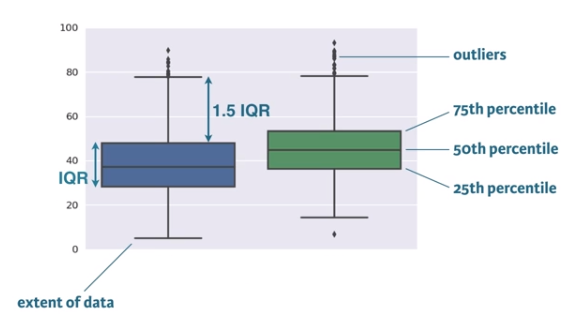

## Your turn! (10 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

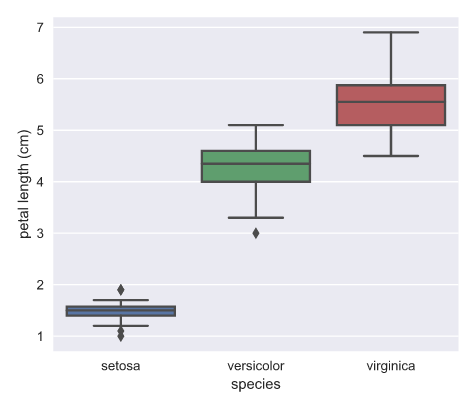

## Solution

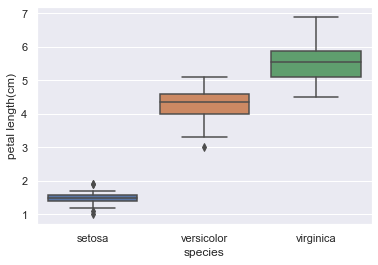

In [12]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
sns.boxplot(x='species',y='petal_length',data=iris)
plt.xlabel("species")
plt.ylabel("petal length(cm)")
plt.show()

## Questions 3-4 (6 points, i.e. 3 pts each)

3. Which species has the largest/smallest standard deviation?
4. Which species has the largest/smallest number of outliers?

## Solution

3.) The species that has the largest number of standard deviation is virginica. The species that has the smallest standard deviation is the setosa. 

4.) The species with the largest number of outliers is setosa and the species with the smallest number of outliers is virginica.

## Bonus! (10 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

## Solution

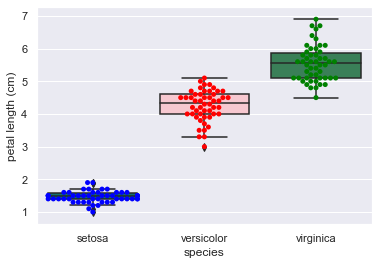

In [13]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
sns.boxplot(x='species',y='petal_length',data=iris, palette=['teal','pink','seagreen'])
plt.xlabel("species")
plt.ylabel("petal length(cm)")
# plt.show()
sns.swarmplot(x='species',y='petal_length',data=iris, palette=['blue','red','green'])
plt.xlabel('species')
plt.ylabel('petal length (cm)')

plt.show()  

## Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


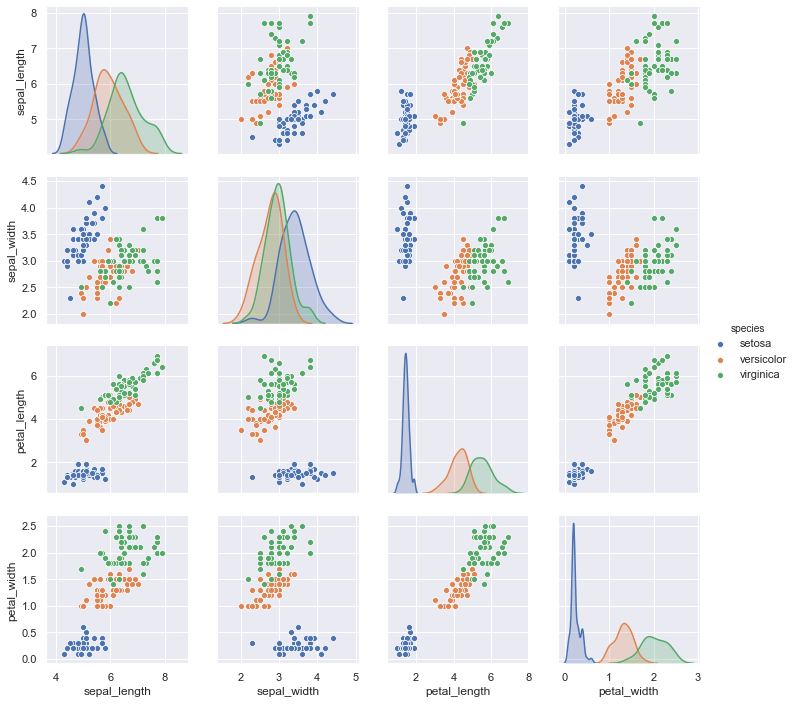

In [14]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))


## Bonus! (15 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.

## Solution

In [15]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

# Compute 1D arrays for petal length and width and sepal length and width
versicolor_sepal_length= iris[iris.species == 'versicolor'].sepal_length
versicolor_sepal_width = iris[iris.species == 'versicolor'].sepal_width
setosa_petal_width = iris[iris.species == 'setosa'].petal_width
setosa_sepal_length = iris[iris.species == 'setosa'].sepal_length
setosa_sepal_width = iris[iris.species == 'setosa'].sepal_width
virginica_petal_width = iris[iris.species == 'virginica'].petal_width
virginica_sepal_length = iris[iris.species == 'virginica'].sepal_length
virginica_sepal_width = iris[iris.species == 'virginica'].sepal_width

#petal length compared to all others per species
setosa_pc = pearson_r(setosa_petal_length, setosa_petal_width)
setosa_pc1 = pearson_r(setosa_petal_length, setosa_sepal_width)
setosa_pc2 = pearson_r(setosa_petal_length, setosa_sepal_length)
versicolor_pc=pearson_r(versicolor_petal_length, versicolor_petal_width)
versicolor_pc1=pearson_r(versicolor_petal_length, versicolor_sepal_width)
versicolor_pc2=pearson_r(versicolor_petal_length, versicolor_sepal_length)
virginica_pc=pearson_r(virginica_petal_length, virginica_petal_width)
virginica_pc1=pearson_r(virginica_petal_length, virginica_sepal_width)
virginica_pc2=pearson_r(virginica_petal_length, virginica_sepal_length)

#sepal length compared to all others per species
setosa_pc_sepal_l = pearson_r(setosa_sepal_length, setosa_petal_width)
setosa_pc_sepal_l1 = pearson_r(setosa_sepal_length,setosa_petal_length)
setosa_ps_sepal_l2 = pearson_r(setosa_sepal_length,setosa_sepal_width)
versicolor_pc_sepal_l=pearson_r(versicolor_sepal_length, versicolor_petal_width)
versicolor_pc_sepal_l1=pearson_r(versicolor_sepal_length, versicolor_petal_length)
versicolor_pc_sepal_l2=pearson_r(versicolor_sepal_length, versicolor_sepal_width)
virginica_pc_sepal_l=pearson_r(virginica_sepal_length, virginica_petal_width)
virginica_pc_sepal_l1=pearson_r(virginica_sepal_length, virginica_petal_length)
virginica_pc_sepal_l2=pearson_r(virginica_sepal_length, virginica_sepal_width)

#petal width compared to all others per species
setosa_pc_w = pearson_r(setosa_petal_width, setosa_petal_length)
setosa_pc1w = pearson_r(setosa_petal_width, setosa_sepal_width)
setosa_pc2_w = pearson_r(setosa_petal_width, setosa_sepal_length)
versicolor_pc_w=pearson_r(versicolor_petal_width, versicolor_petal_length)
versicolor_pc1_w=pearson_r(versicolor_petal_width, versicolor_sepal_width)
versicolor_pc2_w=pearson_r(versicolor_petal_width, versicolor_sepal_length)
virginica_pc_w=pearson_r(virginica_petal_width, virginica_petal_length)
virginica_pc1_w=pearson_r(virginica_petal_width, virginica_sepal_width)
virginica_pc2_w=pearson_r(virginica_petal_width, virginica_sepal_length)

#sepal width versus all others
setosa_pc_sepal_w = pearson_r(setosa_sepal_width, setosa_petal_width)
setosa_pc_sepal_w1 = pearson_r(setosa_sepal_width,setosa_petal_length)
setosa_ps_sepal_w2 = pearson_r(setosa_sepal_width,setosa_sepal_length)
versicolor_pc_sepal_w=pearson_r(versicolor_sepal_width, versicolor_petal_width)
versicolor_pc_sepal_w1=pearson_r(versicolor_sepal_width, versicolor_petal_length)
versicolor_pc_sepal_w2=pearson_r(versicolor_sepal_width, versicolor_sepal_length)
virginica_pc_sepal_w=pearson_r(virginica_sepal_width, virginica_petal_width)
virginica_pc_sepal_w1=pearson_r(virginica_sepal_width, virginica_petal_length)
virginica_pc_sepal_w2=pearson_r(virginica_sepal_width, virginica_sepal_length)

#creates list of list with all values in relation to each species
setosa=[[setosa_pc],[setosa_pc1],[setosa_pc2],[setosa_pc_sepal_l],[setosa_pc_sepal_l1],[setosa_ps_sepal_l2],
        [setosa_pc_w],[setosa_pc1w],[setosa_pc2_w],[setosa_pc_sepal_w],[setosa_pc_sepal_w1],[setosa_ps_sepal_w2] ]
versicolor=[[versicolor_pc],[versicolor_pc1],[versicolor_pc2],[versicolor_pc_sepal_l],[versicolor_pc_sepal_l1],
            [versicolor_pc_sepal_l2],[versicolor_pc_w],[versicolor_pc1_w],[versicolor_pc2_w],[versicolor_pc_sepal_w],
            [versicolor_pc_sepal_w1],[versicolor_pc_sepal_w2]]
virginica=[[virginica_pc],[virginica_pc1],[virginica_pc2],[virginica_pc_sepal_l],[virginica_pc_sepal_l1],
           [virginica_pc_sepal_l2],[virginica_pc_w],[virginica_pc1_w],[virginica_pc2_w],[virginica_pc_sepal_w],
           [virginica_pc_sepal_w1], [virginica_pc_sepal_w2]]

# MUST INSTALL THIS LIBRARY TO USE plotly to make the tablle
# !pip install plotly
import plotly.graph_objects as go
comparision=[['Petal Length vs Petal Width'],['Petal Length vs Sepal Width'],['Petal Length vs Speal Length'],
             ['Petal Width vs Petal Length'],['Petal Width vs Sepal Width'],['Petal Width vs Speal Length'],
             ['Sepal Length vs Petal Width'],['Sepal Length vs Petal Length'],['Sepal Length vs Speal Width'],
             ['Sepal Width vs Petal Width'],['Sepal Width vs Petal Length'],['Sepal Width vs Speal Length'],
            ]
fig = go.Figure(data=[go.Table(header=dict(values=['Pairwise Combinations','Setosa', 'Versicolor', 'Virginica']),
                 cells=dict(
                     values=[
                         comparision,setosa, versicolor,virginica
                     ]))
                     ])
fig.show()
# print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

## Question 5 (6 points)

5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

## Solution

5.)The Pearson correlation coefficient should not be replased with the Spearman rank-order correlation coefficient in this case because the samples seem to have proportional changes as seen in the pairwise graphs. The species is associated with petal and sepal measurements and they change in relation with eachother. Because the distributions (shown in th histograms from the pairwise plot) are gaussian like, using Spearman will not provide dramatically different results than Pearson. 

In [16]:
#This shows that the Spearman does not provide dramatically different results 
# than pearson for Versicolor petal length vs versicolor petal width 
import scipy.stats as stats
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))
s_corr,s_pval=stats.spearmanr(versicolor_petal_length, versicolor_petal_width)
print('Spearman rank-order correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(s_corr))

Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667
Spearman rank-order correlation coefficient between petal length and petal width for versicolor species: 0.78701


## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution


What have you learned form this assignment?
- I learned how to use the seaborn bee swarm plot and its usefulness. I also learned about the binning bias and when to use Pearson over Spearman.

Which parts were the most fun, time-consuming, enlightening, tedious?
- The most fun of this assignment was to make the bee swarm plot and then overlay that to the box and whisker plot and see how similar they are. The most time-consuming and tedious in this case would be the last bonus question which was to compute the pearson correlation for each pairwise combination. The most enlightening was ironically the last bonus because even though it was tedious, I to visualize the pearson ccorrelation for each combination in a table that also comapred each value against species type. Visualizations help to make immediate comparisons and see if those numbers make sense to the framed question. 

What would you do if you had an additional wee to work on this?
- I would probably calculate the Spearman ran-order correlation coefficient for each pairwise combination and plot both spearman and pearson values on a bar graph to compare how alike they are for this situation. I would also probably like to play with more visualization tools with this simple dataset that would be useful for future assignments. 